# Homework 1

In [2]:
import pandas as pd

## Load data

In [3]:
traning_data = pd.read_csv('training_data.csv', delim_whitespace=False, header=None)
columns=['open','high','low','close']
traning_data.columns = columns       #setting columns
traning_data.head()

,open,high,low,close
0,209.894836,216.427353,207.758728,216.208771
1,220.515762,223.029404,218.454163,221.181427
2,221.558975,224.316040,219.323517,224.162048
3,226.958847,233.729813,225.155579,231.325455
4,231.698029,235.170441,228.980698,231.941452


## 大盤折線圖與30日均線圖

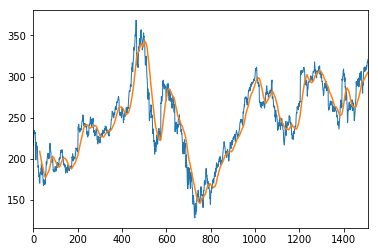

In [4]:
%matplotlib inline
close = traning_data['close']
period=30                         #Average daily line of 30days
sma= close.rolling(period).mean()
close.plot(linewidth=1)
sma.plot()

## 由觀察可知當大盤高於30日均線時大盤傾向於上漲；反之下跌，

>故我的策略為:
>if     close>sma  then buy 
>elif   close<sma  then sell

In [5]:
buy=close>=sma  #close > sma ,then market is tending to rising
sell=close<sma  #close < sma ,then market is tending to falling

In [6]:
trend=pd.Series([0]*len(buy),index=buy.index)
trend[buy]=1
trend[sell]=-1
trend=trend[trend!=0].reindex(trend.index).ffill() #Trend representing the trend of the market

>trend為大盤的傾向，1代表上漲、-1代表下跌、下圖為大盤傾向圖

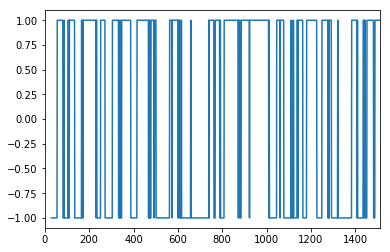

In [7]:
%matplotlib inline
trend.plot()

>接著以走向為依據
>進行股票的買、不動作、賣空，
>分別代表1、0、-1

In [8]:
act=pd.Series([0]*len(trend),index=trend.index) #act is the action we take next day.

temp=0
for i in range(period,len(trend)):
    
    if (temp+trend[i]<=1)&(temp+trend[i]>=-1):
        if (trend[i]==-1):
            act[i]=-1
        else:
            act[i]=1
        temp+=trend[i]

>下圖為act的圖

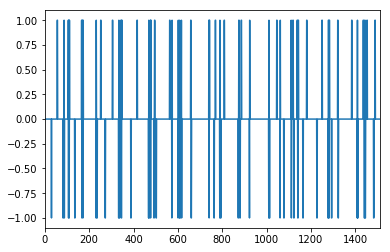

In [9]:
%matplotlib inline
act.plot()

>第一步不操作，故捨棄，
>最後將結果存回csv檔。

In [17]:
act.drop([0],inplace=True)
act.to_csv('output.csv', sep=',', encoding='utf-8',index=False)
act.tail(30)

ValueError: labels [0] not contained in axis